<img src="ChurnRate.png" width = 650 height = 650>

In [32]:
#import plotly
import pandas as pd
import numpy as np
import time


In [33]:
dataset = pd.read_csv('TelcoCustomerChurn.csv')
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [35]:
(dataset.isnull() | dataset.empty | dataset.isna()).sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Arrumar as variáveis de string para num

In [36]:
for index, row in dataset.iterrows():
    if row['PaymentMethod'] == 'Electronic check' or row['PaymentMethod'] == 'Mailed check':
        dataset.loc[index,'AutomaticPayment'] =  float(0)
    elif row['PaymentMethod'] == 'Credit card (automatic)' or row['PaymentMethod'] == 'Bank transfer (automatic)':
        dataset.loc[index,'AutomaticPayment'] =  float(1)


In [37]:
#usado para encontrar as modificações necessárias abaixo
dataset.query('index == 488')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,AutomaticPayment
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No,1.0


In [38]:
replacing = {'gender': {' ': np.nan,'Male': 0, 'Female' : 1},
            'Partner': {' ': np.nan,'No': 0, 'Yes' : 1},
            'Dependents': {' ': np.nan,'No': 0, 'Yes' : 1},
            'PhoneService': {' ': np.nan,'No': 0, 'Yes' : 1},
            'MultipleLines': {' ': np.nan,'No': 0, 'Yes' : 1, 'No phone service' : 2},
            'InternetService': {' ': np.nan,'No': 0, 'Fiber optic': 1, 'DSL' : 2},
            'OnlineSecurity': {' ': np.nan,'No': 0, 'Yes': 1, 'No internet service' : 2},
            'OnlineBackup': {' ': np.nan,'No': 0, 'Yes': 1, 'No internet service' : 2},
            'DeviceProtection': {' ': np.nan,'No': 0, 'Yes': 1, 'No internet service' : 2},
            'TechSupport': {' ': np.nan,'No': 0, 'Yes': 1, 'No internet service' : 2},
            'StreamingTV': {' ': np.nan,'No': 0, 'Yes': 1, 'No internet service' : 2},
            'StreamingMovies': {' ': np.nan,'No': 0, 'Yes': 1, 'No internet service' : 2},
            'Contract': {' ': np.nan,'Month-to-month': 0, 'One year': 1, 'Two year' : 2},
            'PaperlessBilling': {' ': np.nan,'No': 0, 'Yes' : 1},
            'PaymentMethod': {' ': np.nan,'Electronic check': 0, 'Mailed check' : 1, 'Bank transfer (automatic)': 2, 'Credit card (automatic)' : 3},
            'Churn': {' ': np.nan,'No': 0, 'Yes' : 1},
            'TotalCharges': {' ': np.nan}
            }

In [39]:
#dataset_to_regression.query('index == 488')
dataset_to_regression = dataset.replace(replacing)
(dataset_to_regression.isnull() | dataset_to_regression.empty | dataset_to_regression.isna()).sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
AutomaticPayment     0
dtype: int64

In [40]:
dataset_to_regression.dropna(inplace = True)

In [41]:
dataset_to_regression.TotalCharges = dataset_to_regression['TotalCharges'].astype(float)
#pd.to_numeric(dataset_to_regression['TotalCharges'])

In [42]:
dataset_to_regression.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   int64  
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int64  
 4   Dependents        7032 non-null   int64  
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   int64  
 7   MultipleLines     7032 non-null   int64  
 8   InternetService   7032 non-null   int64  
 9   OnlineSecurity    7032 non-null   int64  
 10  OnlineBackup      7032 non-null   int64  
 11  DeviceProtection  7032 non-null   int64  
 12  TechSupport       7032 non-null   int64  
 13  StreamingTV       7032 non-null   int64  
 14  StreamingMovies   7032 non-null   int64  
 15  Contract          7032 non-null   int64  
 16  PaperlessBilling  7032 non-null   int64  


In [43]:
X = dataset_to_regression.drop(['Churn', 'customerID'], axis=1)
y = dataset_to_regression['Churn']

In [44]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   int64  
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   int64  
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   int64  


In [45]:
y.dtype

dtype('int64')

In [46]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

<AxesSubplot:ylabel='Churn'>

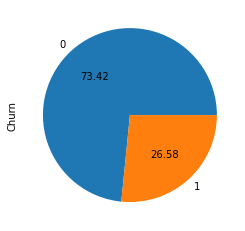

In [47]:
# Show pie plot (Approach 1)
y.value_counts().plot.pie(autopct='%.2f')

### **Random Undersampling**

``'not minority'`` = resample all classes but the minority class

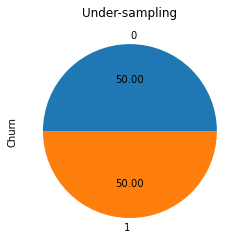

In [48]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
# rus = RandomUnderSampler(sampling_strategy="not minority") # String
X_under, y_under = rus.fit_resample(X, y)

ax = y_under.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [49]:
y_under.value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

In [50]:
#X_under

In [51]:
#y_under

### **Random Oversampling**

``"not majority"`` = resample all classes but the majority class



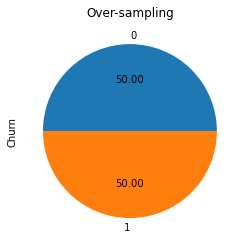

In [52]:
from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_over, y_over = ros.fit_resample(X, y)

ax = y_over.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [53]:
X_over

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,AutomaticPayment
0,1,0,1,0,1,0,2,2,0,1,0,0,0,0,0,1,0,29.85,29.85,0.0
1,0,0,0,0,34,1,0,2,1,0,1,0,0,0,1,0,1,56.95,1889.50,0.0
2,0,0,0,0,2,1,0,2,1,1,0,0,0,0,0,1,1,53.85,108.15,0.0
3,0,0,0,0,45,0,2,2,1,0,1,1,0,0,1,0,2,42.30,1840.75,1.0
4,1,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,0,70.70,151.65,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10321,0,0,1,0,6,1,1,1,0,0,0,0,1,0,0,1,0,82.85,460.25,0.0
10322,0,0,0,0,32,1,0,1,0,0,0,1,1,1,0,1,0,96.20,3183.40,0.0
10323,1,0,0,0,6,1,1,1,1,0,0,0,0,0,0,1,0,79.05,434.50,0.0
10324,1,1,1,0,18,1,1,1,0,0,0,1,1,1,0,0,2,99.75,1836.25,1.0


In [54]:
#X_over

In [55]:
#y_over

In [56]:
from sklearn.model_selection import train_test_split

X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size=0.3)

In [57]:
#X_train_over.info()

In [58]:
from sklearn.model_selection import train_test_split

X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size=0.3)
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size=0.3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


In [60]:
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()
]

In [82]:
results = {"Normal" : {'Nome' : [], 'Score' : [], 'Tempo' : []} ,
           "Over" : {'Nome' : [], 'Score' : [], 'Tempo' : []},
           "Under" : {'Nome' : [], 'Score' : [], 'Tempo' : []}}

results

{'Normal': {'Nome': [], 'Score': [], 'Tempo': []},
 'Over': {'Nome': [], 'Score': [], 'Tempo': []},
 'Under': {'Nome': [], 'Score': [], 'Tempo': []}}

In [ ]:
for name, clf in zip(names, classifiers):
#ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    start = time.time()
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    end = time.time()
    print(f'{name} : {score} | tempo gasto: {end - start}')
    results["Normal"]['Nome'].append(name)
    results["Normal"]['Score'].append(round(score * 100))
    results["Normal"]['Tempo'].append(round(end - start, 2))

Nearest Neighbors : 0.7535545023696683 | tempo gasto: 0.2880213260650635


In [ ]:
for name, clf in zip(names, classifiers):
#ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    start = time.time()
    clf.fit(X_train_over, y_train_over)
    score = clf.score(X_test_over, y_test_over)
    end = time.time()
    print(f'{name} : {score} | tempo gasto: {end - start}')
    results["Over"]['Nome'].append(name)
    results["Over"]['Score'].append(round(score * 100))
    results["Over"]['Tempo'].append(round(end - start, 2))


In [ ]:
for name, clf in zip(names, classifiers):
#ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    start = time.time()
    clf.fit(X_train_under, y_train_under)
    score = clf.score(X_test_under, y_test_under)
    end = time.time()
    print(f'{name} : {score} | tempo gasto: {end - start}')
    results["Under"]['Nome'].append(name)
    results["Under"]['Score'].append(round(score * 100))
    results["Under"]['Tempo'].append(round(end - start, 2))


In [ ]:
results

In [ ]:
Normal_result = pd.DataFrame.from_dict(results['Normal'])
over_result = pd.DataFrame.from_dict(results['Over'])
under_result = pd.DataFrame.from_dict(results['Under'])
result_df = Normal_result

In [ ]:
result_df = pd.concat([result_df, over_result])
result_df = pd.concat([result_df, under_result])
result_df

In [ ]:
result_df.groupby('Nome').Score.mean().sort_values(ascending = False)

In [ ]:
result_df.groupby('Nome').Tempo.mean().sort_values(ascending = False)